# Codebook  
**Authors:** Lauren Baker     
Documenting existing data files of DaanMatch with information about location, owner, "version", source etc.

In [24]:
import boto3
import numpy as np 
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import statistics

In [25]:
client = boto3.client('s3')
resource = boto3.resource('s3')
my_bucket = resource.Bucket('daanmatchdatafiles')

# Dadra & Nagar Haveli.xls

## TOC:
* [About this dataset](#1)
* [Cleaned datasets](#2)
* [What's in this dataset](#3)
* [Codebook](#4)
    * [Missing values](#4.1)
    * [Summary statistics](#4.2)
* [Columns](#5)
    * [DataFrame 1](#5.1)
        * [Sr No.](#5.1.1)
        * [Name of District /Zila Parishad](#5.1.2)
        * [Name of President/Chairperson](#5.1.3)
        * [Completed Postal- address (with PIN Code)](#5.1.4)
        * [Mobile](#5.1.5)
        * [E-mail ID](#5.1.6)
    * [DataFrame 2](#5.2)
        * [Sr No.](#5.2.1)
        * [Name of Gram Panchayat/Village Panchayat](#5.2.2)
        * [Name of Sarpanch/Mukhiya/President](#5.2.3)
        * [Completed Postal- address (with PIN Code)](#5.2.4)
        * [Mobile](#5.2.5)
        * [E-mail ID](#5.2.6)
    * [DataFrame 3](#5.3)
        * [Sr No.](#5.3.1)
        * [Name & Designation of Officer (S)](#5.3.2)
        * [Completed Postal- address (with PIN Code)](#5.3.3)
        * [Tel./Fax (Office)](#5.3.4)
        * [Mobile](#5.3.5)
        * [E-mail ID](#5.3.6)

**About this dataset**  <a class="anchor" id="1"></a>  
Data provided by: Unknown.  
Source: https://daanmatchdatafiles.s3.us-west-1.amazonaws.com/DaanMatch_DataFiles/Dadra+%26+Nagar+Haveli.xls    
Type: xls     
Last Modified: May 29, 2021, 22:50:47 (UTC-07:00)  
Size: 30.0 KB

In [26]:
path = 's3://daanmatchdatafiles/DaanMatch_DataFiles/Dadra & Nagar Haveli.xls'
dadra_nagar = pd.ExcelFile(path)
print(dadra_nagar.sheet_names)
# Combine both sheets
dadra_nagar = dadra_nagar.parse('Sheet1')
dadra_nagar = dadra_nagar.reset_index(drop=True)
dadra_nagar.head()

['Sheet1']


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Proforma ( To be prepared in MS-Excel Format),NaN,NaN,NaN,NaN,NaN
1,NaN,Name of State / UT: UT of Dadra and Nagar Haveli,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Contact-Details of Elected Head/Members of Dis...,NaN,NaN,NaN,NaN,NaN
4,NaN,Sr No.,Name of District /Zila Parishad,Name of President/Chairperson,Completed Postal- address (with PIN Code),Mobile,E-mail ID


**Cleaned datasets** <a class="anchor" id="2"></a>

Contact Details of Elected Head/Members of District Panchayat:

In [27]:
dadra_nagar_1 = dadra_nagar.copy()
dadra_nagar_1 = dadra_nagar_1.rename(columns = {'Unnamed: 1' : 'Sr No.', 'Unnamed: 2' : 'Name of District /Zila Parishad', 'Unnamed: 3' : 'Name of President/Chairperson', 'Unnamed: 4' : 'Completed Postal- address (with PIN Code)', 'Unnamed: 5' : 'Mobile', 'Unnamed: 6' : 'E-mail ID'})
dadra_nagar_1 = dadra_nagar_1.iloc[5:25, 1:]
dadra_nagar_1 = dadra_nagar_1.reset_index(drop=True)
dadra_nagar_1.head()

,Sr No.,Name of District /Zila Parishad,Name of President/Chairperson,Completed Postal- address (with PIN Code),Mobile,E-mail ID
0,1,District Panchayat,"Shri Kakva Ramanbhai Devjibhai, President, DP",NaN,9824749121,dpo-dnh@nic.in
1,2,Dadra and Nagar Haveli,"Shri Gavit Maheshbhai Chimanbhai, Vice-Preside...",NaN,9624001777,dpo-dnh@nic.in
2,3,Silvassa,Smt. Patel Jigishaben Hitendra,Gram Panchayat Naroli,9714310164,dpo-dnh@nic.in
3,4,NaN,Smt. Patel Jashodaben Ravindra,Gram Panchayat Kharadpada,8758824809,dpo-dnh@nic.in
4,5,NaN,Shri Vartha Sumanbhai Raghubhai,Gram Panchayat Galonda,9925323231,dpo-dnh@nic.in


Contact Details of Elected Head of Gram Panchayat/Village Panchayats:

In [28]:
dadra_nagar_2 = dadra_nagar.copy()
dadra_nagar_2 = dadra_nagar_2.rename(columns = {'Unnamed: 1' : 'Sr No.', 'Unnamed: 2' : 'Name of Gram Panchayat/Village Panchayat', 'Unnamed: 3' : 'Name of Sarpanch/Mukhiya/President', 'Unnamed: 4' : 'Completed Postal- address (with PIN Code)', 'Unnamed: 5' : 'Mobile', 'Unnamed: 6' : 'E-mail ID'})
dadra_nagar_2 = dadra_nagar_2.iloc[37:57, 1:]
dadra_nagar_2 = dadra_nagar_2.reset_index(drop=True)
dadra_nagar_2.head()

,Sr No.,Name of Gram Panchayat/Village Panchayat,Name of Sarpanch/Mukhiya/President,Completed Postal- address (with PIN Code),Mobile,E-mail ID
0,1,Surangi,Smt.Kakad Ashaben Dhanjibhai,Gram Panchayat Surangi,9924740998,dpo-dnh@nic.in
1,2,Kauncha,Smt.Gond Kamlaben Rupjibhai,Gram Panchayat Kauncha,7621992170,dpo-dnh@nic.in
2,3,Naroli,Smt.Dodia Pritiben Jitendersinh,Gram Panchayat Naroli,9824481685,dpo-dnh@nic.in
3,4,Kharadpada,Shri Radiya Patadiya Katya,Gram Panchayat Kharadpada,9377007205,dpo-dnh@nic.in
4,5,Galonda,Shri Bhurkud Ishwarbhai,Gram Panchayat Galonda,9925678785,dpo-dnh@nic.in


Contact Details of State-Level Nodal Officer (designated for compilation of Contact Details of Eleceted Head of Gram Panchayats/Intermediate Panchayat/District panchayats):

In [29]:
dadra_nagar_3 = dadra_nagar.copy()
dadra_nagar_3 = dadra_nagar_3.rename(columns = {'Unnamed: 1' : 'Sr No.', 'Unnamed: 2' : 'Name & Designation of Officer (S)', 'Unnamed: 3' : 'Completed Postal- address (with PIN Code)', 'Unnamed: 4' : 'Tel./Fax (Office)', 'Unnamed: 5' : 'Mobile', 'Unnamed: 6' : 'E-mail ID'})
dadra_nagar_3 = dadra_nagar_3.iloc[62:, 1:]
dadra_nagar_3 = dadra_nagar_3.reset_index(drop=True)
dadra_nagar_3.head()

,Sr No.,Name & Designation of Officer (S),Completed Postal- address (with PIN Code),Tel./Fax (Office),Mobile,E-mail ID
0,1,"Dr. D. M. Dumralia, Development and planning O...","66, KV Road Amli, Opposite Vidhyut Bhavan Sil...",2602632303,9824540765,dpo-dnh@nic.in


**What's in this dataset?** <a class="anchor" id="3"></a>

In [30]:
print("DataFrame 1:")
print("Shape:", dadra_nagar_1.shape)
print("Rows:", dadra_nagar_1.shape[0])
print("Columns:", dadra_nagar_1.shape[1])
print("Each row is the contact details of an elected head/ members of District Panchayat.")
print('\n')
print("DataFrame 2:")
print("Shape:", dadra_nagar_2.shape)
print("Rows:", dadra_nagar_2.shape[0])
print("Columns:", dadra_nagar_2.shape[1])
print("Each row is the contact details of an elected head of Gram Panchayat/Village Panchayats.")
print('\n')
print("DataFrame 3:")
print("Shape:", dadra_nagar_3.shape)
print("Rows:", dadra_nagar_3.shape[0])
print("Columns:", dadra_nagar_3.shape[1])
print("Each row is the contact details of a state-level Nodal Officer.")

DataFrame 1:
Shape: (20, 6)
Rows: 20
Columns: 6
Each row is the contact details of an elected head/ members of District Panchayat.


DataFrame 2:
Shape: (20, 6)
Rows: 20
Columns: 6
Each row is the contact details of an elected head of Gram Panchayat/Village Panchayats.


DataFrame 3:
Shape: (1, 6)
Rows: 1
Columns: 6
Each row is the contact details of a state-level Nodal Officer.


**Codebook** <a class="anchor" id="4"></a>

In [31]:
print("DataFrame 1 Codebook:")
dadra_nagar_1_columns = [column for column in dadra_nagar_1.columns]
dadra_nagar_1_description = ["Number of elected head/ member of District Panchayat. Starts at 1 and goes up to 20.",
                            "The name of the district / Zila Parishad where the elected head / member resides.",
                            "Name of the President / Chairsperson.",
                            'Title does not relate to content of column. The column contains strings that all begin with "Gram Panchayat," which is the name of a basic village governing democractic structed institute in Indian villages. The strings also each have the name of a village followed by "Gram Panchayat".',
                            "Mobile phone number of the president / chairperson.",
                            "Email address of the president / chairperson."]
dadra_nagar_1_dtypes = [dtype for dtype in dadra_nagar_1.dtypes]

data_1 = {"Column Name": dadra_nagar_1_columns, "Description": dadra_nagar_1_description, "Type": dadra_nagar_1_dtypes}
dadra_nagar_1_codebook = pd.DataFrame(data_1)
dadra_nagar_1_codebook.style.set_properties(subset=['Description'], **{'width': '600px'})

DataFrame 1 Codebook:


,Column Name,Description,Type
0,Sr No.,Number of elected head/ member of District Panchayat. Starts at 1 and goes up to 20.,object
1,Name of District /Zila Parishad,The name of the district / Zila Parishad where the elected head / member resides.,object
2,Name of President/Chairperson,Name of the President / Chairsperson.,object
3,Completed Postal- address (with PIN Code),"Title does not relate to content of column. The column contains strings that all begin with ""Gram Panchayat,"" which is the name of a basic village governing democractic structed institute in Indian villages. The strings also each have the name of a village followed by ""Gram Panchayat"".",object
4,Mobile,Mobile phone number of the president / chairperson.,object
5,E-mail ID,Email address of the president / chairperson.,object


In [32]:
print("DataFrame 2 Codebook:")
dadra_nagar_2_columns = [column for column in dadra_nagar_2.columns]
dadra_nagar_2_description = ["Number of elected head of Gram Panchayat / Village Panchayats. Starts at 1 and goes up to 20.",
                            "The name of the village the elected head resides in.",
                            "Name of the Sarpanch / Mukhiya / President.",
                            'Title does not relate to content of column. The column contains strings that all begin with "Gram Panchayat," which is the name of a basic village governing democractic structed institute in Indian villages. The strings also each have the name of the village from the second column followed by "Gram Panchayat".',
                            "Mobile phone number of the elected head.",
                            "Email address of the elected head."]
dadra_nagar_2_dtypes = [dtype for dtype in dadra_nagar_2.dtypes]

data_2 = {"Column Name": dadra_nagar_2_columns, "Description": dadra_nagar_2_description, "Type": dadra_nagar_2_dtypes}
dadra_nagar_2_codebook = pd.DataFrame(data_2)
dadra_nagar_2_codebook.style.set_properties(subset=['Description'], **{'width': '600px'})

DataFrame 2 Codebook:


,Column Name,Description,Type
0,Sr No.,Number of elected head of Gram Panchayat / Village Panchayats. Starts at 1 and goes up to 20.,object
1,Name of Gram Panchayat/Village Panchayat,The name of the village the elected head resides in.,object
2,Name of Sarpanch/Mukhiya/President,Name of the Sarpanch / Mukhiya / President.,object
3,Completed Postal- address (with PIN Code),"Title does not relate to content of column. The column contains strings that all begin with ""Gram Panchayat,"" which is the name of a basic village governing democractic structed institute in Indian villages. The strings also each have the name of the village from the second column followed by ""Gram Panchayat"".",object
4,Mobile,Mobile phone number of the elected head.,object
5,E-mail ID,Email address of the elected head.,object


In [117]:
print("DataFrame 3 Codebook:")
dadra_nagar_3_columns = [column for column in dadra_nagar_3.columns]
dadra_nagar_3_description = ["Number of state-level nodel officer. Starts at 1 and only contains that single row.",
                            "The name and title of the officer.",
                            "The postal address, including PIN Code, of the officer.",
                            "Telephone / Fax number of the office of the officer.",
                            "Mobile phone number of the officer.",
                            "Email address of the officer."]
dadra_nagar_3_dtypes = [dtype for dtype in dadra_nagar_3.dtypes]

data_3 = {"Column Name": dadra_nagar_3_columns, "Description": dadra_nagar_3_description, "Type": dadra_nagar_3_dtypes}
dadra_nagar_3_codebook = pd.DataFrame(data_3)
dadra_nagar_3_codebook.style.set_properties(subset=['Description'], **{'width': '600px'})

DataFrame 3 Codebook:


,Column Name,Description,Type
0,Sr No.,Number of state-level nodel officer. Starts at 1 and only contains that single row.,object
1,Name & Designation of Officer (S),The name and title of the officer.,object
2,Completed Postal- address (with PIN Code),"The postal address, including PIN Code, of the officer.",object
3,Tel./Fax (Office),Telephone / Fax number of the office of the officer.,object
4,Mobile,Mobile phone number of the officer.,object
5,E-mail ID,Email address of the officer.,object


**Missing values** <a class="anchor" id="4.1"></a>

In [34]:
dadra_nagar_1.isnull().sum()

Sr No.                                        0
Name of District /Zila Parishad              17
Name of President/Chairperson                 0
Completed Postal- address (with PIN Code)     2
Mobile                                        0
E-mail ID                                     0
dtype: int64

In [35]:
dadra_nagar_2.isnull().sum()

Sr No.                                       0
Name of Gram Panchayat/Village Panchayat     0
Name of Sarpanch/Mukhiya/President           0
Completed Postal- address (with PIN Code)    0
Mobile                                       0
E-mail ID                                    0
dtype: int64

In [36]:
dadra_nagar_3.isnull().sum()

Sr No.                                       0
Name & Designation of Officer (S)            0
Completed Postal- address (with PIN Code)    0
Tel./Fax (Office)                            0
Mobile                                       0
E-mail ID                                    0
dtype: int64

**Summary statistics** <a class="anchor" id="4.2"></a>

In [37]:
dadra_nagar_1.describe()

,Sr No.,Name of District /Zila Parishad,Name of President/Chairperson,Completed Postal- address (with PIN Code),Mobile,E-mail ID
count,20,3,20,18,20,20
unique,20,3,20,18,19,1
top,1,Silvassa,Shri Rajeshbhai Ranabhai Patel,Gram Panchayat Galonda,9824252100,dpo-dnh@nic.in
freq,1,1,1,1,2,20


In [38]:
dadra_nagar_2.describe()

,Sr No.,Name of Gram Panchayat/Village Panchayat,Name of Sarpanch/Mukhiya/President,Completed Postal- address (with PIN Code),Mobile,E-mail ID
count,20,20,20,20,20,20
unique,20,20,20,20,20,1
top,1,Rakholi,Shri Radiya Patadiya Katya,Gram Panchayat Galonda,9824403392,dpo-dnh@nic.in
freq,1,1,1,1,1,20


In [39]:
dadra_nagar_3.describe()

,Sr No.,Name & Designation of Officer (S),Completed Postal- address (with PIN Code),Tel./Fax (Office),Mobile,E-mail ID
count,1,1,1,1,1,1
unique,1,1,1,1,1,1
top,1,"Dr. D. M. Dumralia, Development and planning O...","66, KV Road Amli, Opposite Vidhyut Bhavan Sil...",2602632303,9824540765,dpo-dnh@nic.in
freq,1,1,1,1,1,1


## Columns
<a class="anchor" id="5"></a>

### DataFrame 1
<a class="anchor" id="5.1"></a>
DataFrame 1 contains the contact details of elected heads and members of district Panchayat. 

### Sr No.
<a class="anchor" id="5.1.1"></a>
Number of elected head or member of District Panchayat. Starts at 1 and goes up to 20.

In [40]:
column = dadra_nagar_1["Sr No."]
column

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: Sr No., dtype: object

In [41]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 20
Duplicates: {}


### Name of District / Zila Parishad
<a class="anchor" id="5.1.2"></a>
The name of the district / Zila Parishad where the elected head / member resides.

In [42]:
column = dadra_nagar_1["Name of District /Zila Parishad"]
column

0         District Panchayat
1     Dadra and Nagar Haveli
2                   Silvassa
3                        NaN
4                        NaN
5                        NaN
6                        NaN
7                        NaN
8                        NaN
9                        NaN
10                       NaN
11                       NaN
12                       NaN
13                       NaN
14                       NaN
15                       NaN
16                       NaN
17                       NaN
18                       NaN
19                       NaN
Name: Name of District /Zila Parishad, dtype: object

In [43]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 4
Duplicates: {nan: 17}


### Name of President/Chairperson
<a class="anchor" id="5.1.3"></a>

In [44]:
column = dadra_nagar_1["Name of President/Chairperson"]
column

0         Shri Kakva Ramanbhai Devjibhai, President, DP
1     Shri Gavit Maheshbhai Chimanbhai, Vice-Preside...
2                        Smt. Patel Jigishaben Hitendra
3                        Smt. Patel Jashodaben Ravindra
4                       Shri Vartha Sumanbhai Raghubhai
5                       Shri Ghughsa Dilipbhai Lalabhai
6                   Shri Madha Jatariyabhai Budhiyabhai
7                       Shri Rajeshbhai  Ranabhai Patel
8                      Shri Patel Pravinbhai Raviyabhai
9                      Smt. Patel Chandanben Dineshbhai
10                    Shri Vartha Vishnubhai Dharmabhai
11                      Smt. Hadal Sangitaben Rupjibhai
12                            Shri Dhodhde Sante Mahiya
13                       Smt.Ghutiya Vanitaben Yashwant
14                Smt. Kharpadiya Shitalben  Sanjaybhai
15                       Smt.Shetty Rajniben Govindbhai
16                      Shri Bhimra Bhikubhai Vansabhai
17                       Shri Gond Ashaben Shail

In [50]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 20
Duplicates: {}


In [56]:
#Show how many Elected Officials are male and female
names = np.array(column)
man = 0
woman = 0
for name in names:
    title = str(name)[:3]
    if (title.__eq__('Shr')):
        man += 1
    else:
        woman += 1

genders = pd.DataFrame(data = {'Title of President / Chairperson' : ['Shri', 'Smt'], 
                               'Gender' : ['Men', 'Women'], 
                               'Count' : [man, woman]})
genders

,Title of President / Chairperson,Gender,Count
0,Shri,Men,12
1,Smt,Women,8


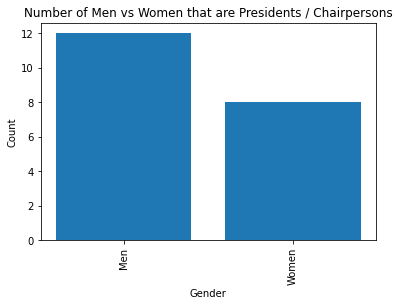

In [57]:
# Plot number of men and women
plt.bar(genders["Gender"], genders["Count"])
plt.title("Number of Men vs Women that are Presidents / Chairpersons")
plt.xlabel("Gender")
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### Completed Postal- address (with PIN Code)
<a class="anchor" id="5.1.4"></a>
Title does not relate to content of column. The column contains strings that all begin with "Gram Panchayat," which is the name of a basic village governing democractic structed institute in Indian villages. The strings also each have the name of a village followed by "Gram Panchayat".

In [58]:
column = dadra_nagar_1["Completed Postal- address (with PIN Code)"]
column

0                           NaN
1                           NaN
2         Gram Panchayat Naroli
3     Gram Panchayat Kharadpada
4        Gram Panchayat Galonda
5        Gram Panchayat Kilvani
6         Gram Panchayat Randha
7     Gram Panchayat Samarvarni
8          Gram Panchayat Masat
9        Gram Panchayat Rakholi
10         Gram Panchayat Sayli
11        Gram Panchayat Dapada
12        Gram Panchayat Amboli
13        Gram Panchayat Kherdi
14       Gram Panchayat Dudhani
15       Gram Panchayat Khanvel
16        Gram Panchayat Rudana
17       Gram Panchayat Mandoni
18       Gram Panchayat Sindoni
19         Gram Panchayat Dadra
Name: Completed Postal- address (with PIN Code), dtype: object

In [59]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 19
Duplicates: {nan: 2}


In [64]:
#Show names of villages without "Gram Panchayat" at front
villages = []
for village in np.array(column):
    villages.append(str(village)[15:])
villages

['',
 '',
 'Naroli',
 'Kharadpada',
 'Galonda',
 'Kilvani',
 'Randha',
 'Samarvarni',
 'Masat',
 'Rakholi',
 'Sayli',
 'Dapada',
 'Amboli',
 'Kherdi',
 'Dudhani',
 'Khanvel',
 'Rudana',
 'Mandoni',
 'Sindoni',
 'Dadra']

### Mobile
<a class="anchor" id="5.1.5"></a>
Mobile phone number of the president / chairperson.

In [73]:
column = dadra_nagar_1["Mobile"]
column

0                  9824749121
1                  9624001777
2                  9714310164
3                  8758824809
4                  9925323231
5                  9904748254
6                  9824252100
7                  9725566189
8                  9924104388
9                  7698559928
10                 9099029304
11                 9904220101
12                 9824101416
13                 9824734870
14                 9824759567
15                 9998691635
16                 9824252100
17                 7623950405
18    9638479038 / 9737811595
19                 9824151845
Name: Mobile, dtype: object

In [74]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 19
Duplicates: {9824252100: 2}


### E-mail ID
<a class="anchor" id="5.1.6"></a>
Email address of the president / chairperson.

In [67]:
column = dadra_nagar_1["E-mail ID"]
column

0     dpo-dnh@nic.in
1     dpo-dnh@nic.in
2     dpo-dnh@nic.in
3     dpo-dnh@nic.in
4     dpo-dnh@nic.in
5     dpo-dnh@nic.in
6     dpo-dnh@nic.in
7     dpo-dnh@nic.in
8     dpo-dnh@nic.in
9     dpo-dnh@nic.in
10    dpo-dnh@nic.in
11    dpo-dnh@nic.in
12    dpo-dnh@nic.in
13    dpo-dnh@nic.in
14    dpo-dnh@nic.in
15    dpo-dnh@nic.in
16    dpo-dnh@nic.in
17    dpo-dnh@nic.in
18    dpo-dnh@nic.in
19    dpo-dnh@nic.in
Name: E-mail ID, dtype: object

In [100]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 1
Duplicates: {'dpo-dnh@nic.in ': 20}


### DataFrame 2
<a class="anchor" id="5.2"></a>
DataFrame 2 contains the contact details of the elected heads of Gram Panchayat/ Village Panchayats. 

### Sr No.
<a class="anchor" id="5.2.1"></a>
Number of elected head of Gram Panchayat / Village Panchayats. Starts at 1 and goes up to 20.

In [69]:
column = dadra_nagar_2["Sr No."]
column

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: Sr No., dtype: object

In [70]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 20
Duplicates: {}


### Name of Gram Panchayat/Village Panchayat
<a class="anchor" id="5.2.2"></a>
The name of the village the elected head resides in.

In [82]:
column = dadra_nagar_2["Name of Gram Panchayat/Village Panchayat"]
villages_2 = np.array(column)
column

0        Surangi
1        Kauncha
2         Naroli
3     Kharadpada
4        Galonda
5        Kilavni
6         Randha
7     Samarvarni
8          Masat
9        Rakholi
10         sayli
11        Dapada
12        Amboli
13        Kherdi
14       Dudhani
15       Khanvel
16        Rudana
17       Mandoni
18       Sindoni
19         Dadra
Name: Name of Gram Panchayat/Village Panchayat, dtype: object

In [72]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 20
Duplicates: {}


### Name of Sarpanch/Mukhiya/President
<a class="anchor" id="5.2.3"></a>

In [75]:
column = dadra_nagar_2["Name of Sarpanch/Mukhiya/President"]
column

0          Smt.Kakad Ashaben Dhanjibhai
1           Smt.Gond Kamlaben Rupjibhai
2       Smt.Dodia Pritiben Jitendersinh
3            Shri Radiya Patadiya Katya
4               Shri Bhurkud Ishwarbhai
5            Smt.Yashwantiben Kantubhai
6                Shri Chudhari Zinabhai
7       Shri Patel Sureshbhai Vajirbhai
8       Shri Patel Raviyabhai Limjibhai
9        Smt.Patel Champaben Prabhubhai
10       Shri  Patel  Gitaben Madhubhai
11    Smt.Choudhary Radhuben Rajeshbhai
12                Shri Gorat Pravinbhai
13               Shri Bariya Chandubhai
14        Smt.Ghatal Saynaben Mohanbhai
15               Smt.Vaghera Anita Ablu
16                  Shri Chimbda Sandip
17        Smt.Nadge Kanchanben Laxibhai
18     Shri Bhusara Vipulbhai Kakadbhai
19    Smt. Patel Sumitraben Jayantibhai
Name: Name of Sarpanch/Mukhiya/President, dtype: object

In [76]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 20
Duplicates: {}


In [77]:
#Show how many Elected Officials are male and female
names = np.array(column)
man = 0
woman = 0
for name in names:
    title = str(name)[:3]
    if (title.__eq__('Shr')):
        man += 1
    else:
        woman += 1

genders = pd.DataFrame(data = {'Title of President / Chairperson' : ['Shri', 'Smt'], 
                               'Gender' : ['Men', 'Women'], 
                               'Count' : [man, woman]})
genders

,Title of President / Chairperson,Gender,Count
0,Shri,Men,10
1,Smt,Women,10


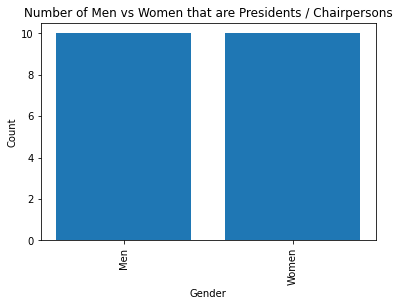

In [78]:
# Plot number of men and women
plt.bar(genders["Gender"], genders["Count"])
plt.title("Number of Men vs Women that are Presidents / Chairpersons")
plt.xlabel("Gender")
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### Completed Postal- address (with PIN Code)
<a class="anchor" id="5.2.4"></a>
Title does not relate to content of column. The column contains strings that all begin with "Gram Panchayat," which is the name of a basic village governing democractic structed institute in Indian villages. The strings also each have the name of the village from the second column followed by "Gram Panchayat".

In [91]:
column = dadra_nagar_2["Completed Postal- address (with PIN Code)"]
column

0        Gram Panchayat Surangi
1        Gram Panchayat Kauncha
2         Gram Panchayat Naroli
3     Gram Panchayat Kharadpada
4        Gram Panchayat Galonda
5        Gram Panchayat Kilavni
6         Gram Panchayat Randha
7     Gram Panchayat Samarvarni
8          Gram Panchayat Masat
9        Gram Panchayat Rakholi
10         Gram Panchayat sayli
11        Gram Panchayat Dapada
12        Gram Panchayat Amboli
13        Gram Panchayat Kherdi
14       Gram Panchayat Dudhani
15       Gram Panchayat Khanvel
16        Gram Panchayat Rudana
17       Gram Panchayat Mandoni
18       Gram Panchayat Sindoni
19         Gram Panchayat Dadra
Name: Completed Postal- address (with PIN Code), dtype: object

In [80]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 20
Duplicates: {}


In [95]:
#See if village name is equal to the village name in 2nd column
villages = []
for village in np.array(column):
    villages.append(str(village)[15:])
i = 0
villages

for village in villages_2:
    if str(village).__eq__(villages[i]):
        print(True)
    else:
        print(False)
    i += 1

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


### Mobile
<a class="anchor" id="5.2.5"></a>
Mobile phone number of the elected head.

In [97]:
column = dadra_nagar_2["Mobile"]
column

0     9924740998
1     7621992170
2     9824481685
3     9377007205
4     9925678785
5     9879129712
6     9714243400
7     9624826890
8     9726693966
9     9904443067
10    9824181567
11    9574437277
12    9904977880
13    9824403392
14    9904564267
15    9824729569
16    9824303566
17    7046339182
18    8460270761
19    7698644788
Name: Mobile, dtype: object

In [98]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 20
Duplicates: {}


### E-mail ID
<a class="anchor" id="5.2.6"></a>
Email address of the elected head.

In [99]:
column = dadra_nagar_2["E-mail ID"]
column

0     dpo-dnh@nic.in 
1     dpo-dnh@nic.in 
2     dpo-dnh@nic.in 
3     dpo-dnh@nic.in 
4     dpo-dnh@nic.in 
5     dpo-dnh@nic.in 
6     dpo-dnh@nic.in 
7     dpo-dnh@nic.in 
8     dpo-dnh@nic.in 
9     dpo-dnh@nic.in 
10    dpo-dnh@nic.in 
11    dpo-dnh@nic.in 
12    dpo-dnh@nic.in 
13    dpo-dnh@nic.in 
14    dpo-dnh@nic.in 
15    dpo-dnh@nic.in 
16    dpo-dnh@nic.in 
17    dpo-dnh@nic.in 
18    dpo-dnh@nic.in 
19    dpo-dnh@nic.in 
Name: E-mail ID, dtype: object

In [101]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 1
Duplicates: {'dpo-dnh@nic.in ': 20}


### DataFrame 3
<a class="anchor" id="5.3"></a>
DataFrame 3 contains the contact details of the elected heads of a state-level Nodal Officer.   
There is only one row in the table, so below is the value in each column for that singular row:

### Sr No.
<a class="anchor" id="5.3.1"></a>
Number of state-level nodel officer. Starts at 1 and only contains that single row.

In [113]:
dadra_nagar_3["Sr No."][0]

1

### Name & Designation of Officer (S)
<a class="anchor" id="5.3.2"></a>
The name and title of the officer.

In [114]:
dadra_nagar_3["Name & Designation of Officer (S)"][0]

'Dr. D. M. Dumralia, Development and planning Officer'

### Completed Postal- address (with PIN Code)
<a class="anchor" id="5.3.3"></a>
The postal address, including PIN Code, of the officer.

In [115]:
dadra_nagar_3["Completed Postal- address (with PIN Code)"][0]

'66, KV Road Amli, Opposite Vidhyut Bhavan  Silvassa, 396230'

### Tel./Fax (Office)
<a class="anchor" id="5.3.4"></a>
Telephone / Fax number of the office of the officer.

In [118]:
dadra_nagar_3["Tel./Fax (Office)"][0]

2602632303

### Mobile
<a class="anchor" id="5.3.5"></a>
Mobile phone number of the officer.

In [120]:
dadra_nagar_3["Mobile"][0]

9824540765

### E-mail ID
<a class="anchor" id="5.3.6"></a>
Email address of the officer.

In [119]:
dadra_nagar_3["E-mail ID"][0]

'dpo-dnh@nic.in '